# NEURON SIMULATOR STEP-BY-STEP GUIDE

This guide main aim is to show you how to use the NEURON Simulator on VSCode.

This file is called Jypyter notebook. It is a powerful tool for interactively developing and presenting data science projects. It combines code, visualizations, narrative text, and other rich media into a single document, creating a cohesive and expressive workflow.

## Set up

### NEURON Simulator set up
To download the app, look at this guide: https://nrn.readthedocs.io/en/8.2.6/install/install_instructions.html


### VSCode/Python set up
- VSCode download: https://code.visualstudio.com/Download
- Tutorial to download VScode: https://www.youtube.com/watch?time_continue=2&v=4iUJZEa2xP8&embeds_referring_euri=https%3A%2F%2Fduckduckgo.com%2F
- Python download: https://www.python.org/downloads/


### Choosing kernel
There will be a step asking you to choose kernel. Click into anything related to python environment

## How to use this notebook

- There are two types of box in here, 1 is code box and 1 is markdown box.
- To run the code, click the triangle on the left side of the box. To make changes on the code, click to the code in the box.
- To add the box, click either + Code / + Markdown at the top of this file.

- For more guide on how to use Jupyter Notebook: https://code.visualstudio.com/docs/datascience/jupyter-notebooks

## Run simulation

### Installments
Run these lines of codes. For the matplotlib, you only need to run it once.

In [ ]:
# Download matplotlib
!pip install matplotlib

In [1]:
# Import NEURON and optional GUI
from neuron import h, gui  

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Import numpy for array handling
import numpy as np

### Investigating the Effects of Ion Channel Density on Neuron Firing Patterns

#### Goals
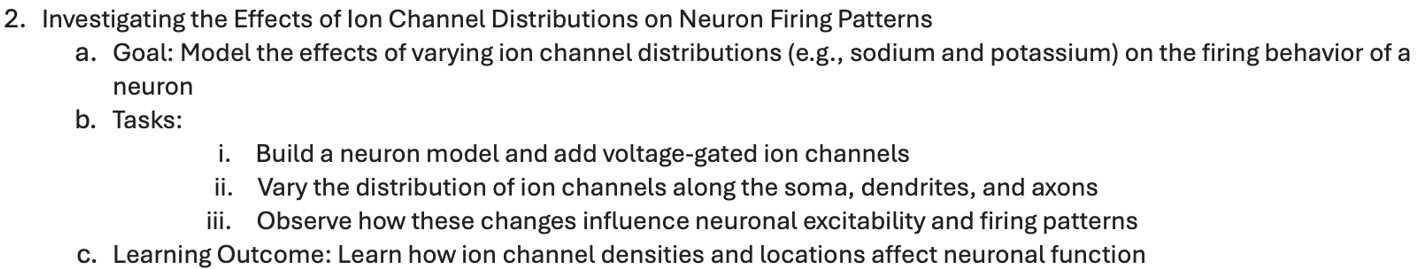

#### Variables and constant setting
For Na+:  
- Low channel density - .05
- Moderate channel density - 0.1
- High channel density - 0.2
- Very high channel density - 0.3  
  
For Na+:  
- Soma: Low to moderate Na⁺ channel density (~0.05 - 0.1 S/cm²)
- Axon (hillock and nodes of Ranvier): High (~0.1 - 0.3 S/cm²)
- Dendrites: Low Na⁺ channel density (~0.05 - 0.1 S/cm²)  
  
For Na+: Default Distribution  
- Hypothetical biologically realistic parameters per component:
- Soma: 0.05 S/cm²
- Axon: 0.2 S/cm² (at nodes of Ranvier, and a gradient could be applied down the axon)
- Dendrites: 0.05 S/cm²  
  

For K+: Default Distribution  
- Soma: 0.2 S/cm²
- Axon (nodes): 0.05 - 0.1 S/cm²
- Dendrites: 0.2 S/cm²

#### Test-Trial 1:

Channel density is changed in this model using the max conductance (pertains to the HH model and how we reach these models/ make them)

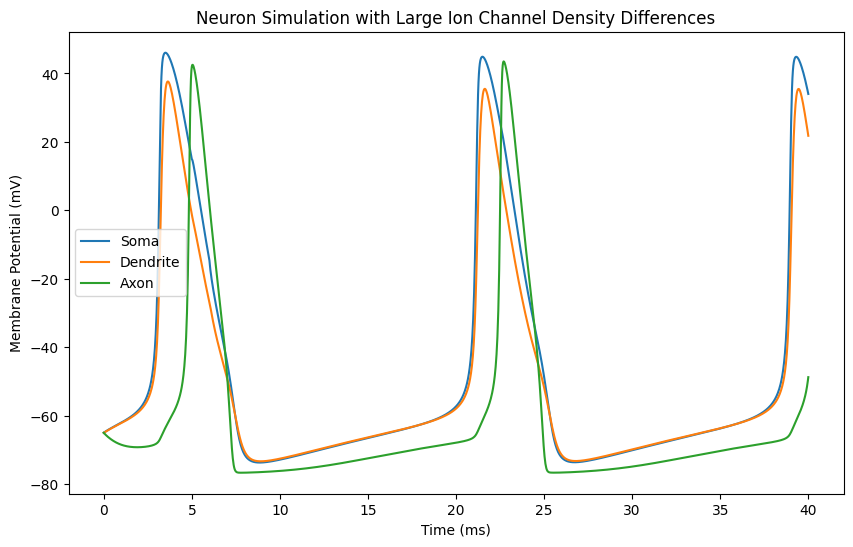

In [2]:
# Create sections: soma, dendrites, and axon
soma = h.Section(name='soma')
dend = h.Section(name='dend')
axon = h.Section(name='axon')


# Define section geometry
soma.L = soma.diam = 20  # Soma is spherical, diameter = 20 µm
dend.L = 200             # Dendrite length = 200 µm
dend.diam = 2            # Dendrite diameter = 2 µm
axon.L = 1000            # Axon length = 1000 µm
axon.diam = 1            # Axon diameter = 1 µm


# Connect the sections
dend.connect(soma(0))    # Connect dendrite to soma
axon.connect(soma(1))    # Connect axon to soma


# Insert ion channels
soma.insert('hh')  # Insert Hodgkin-Huxley mechanism in soma
dend.insert('hh')  # Insert Hodgkin-Huxley mechanism in dendrite
axon.insert('hh')  # Insert Hodgkin-Huxley mechanism in axon


# Vary ion channel densities significantly
for seg in soma:
   seg.hh.gnabar = 0.25  # High sodium channel density (S/cm^2)
   seg.hh.gkbar = 0.01   # Low potassium channel density (S/cm^2)


for seg in dend:
   seg.hh.gnabar = 0.01  # Very low sodium channel density (S/cm^2)
   seg.hh.gkbar = 0.005  # Very low potassium channel density (S/cm^2)


for seg in axon:
   seg.hh.gnabar = 0.3   # Very high sodium channel density (S/cm^2)
   seg.hh.gkbar = 0.1    # High potassium channel density (S/cm^2)


# Add a current clamp to the soma
stim = h.IClamp(soma(0.5))  # Place the stimulator at the middle of the soma
stim.delay = 5.0           # Start of stimulation (ms)
stim.dur = 1.0             # Duration of stimulation (ms)
stim.amp = 0.5             # Amplitude of current (nA)


# Record membrane potentials
soma_v = h.Vector().record(soma(0.5)._ref_v)  # Record voltage at soma
dend_v = h.Vector().record(dend(0.5)._ref_v)  # Record voltage at dendrite
axon_v = h.Vector().record(axon(0.5)._ref_v)  # Record voltage at axon
t = h.Vector().record(h._ref_t)               # Record time


# Simulation control
h.tstop = 40.0  # Simulation time (ms)
h.run()

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, soma_v, label="Soma")
plt.plot(t, dend_v, label="Dendrite")
plt.plot(t, axon_v, label="Axon")
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Neuron Simulation with Large Ion Channel Density Differences')
plt.legend()
plt.show()

#### Test-Trial 2:

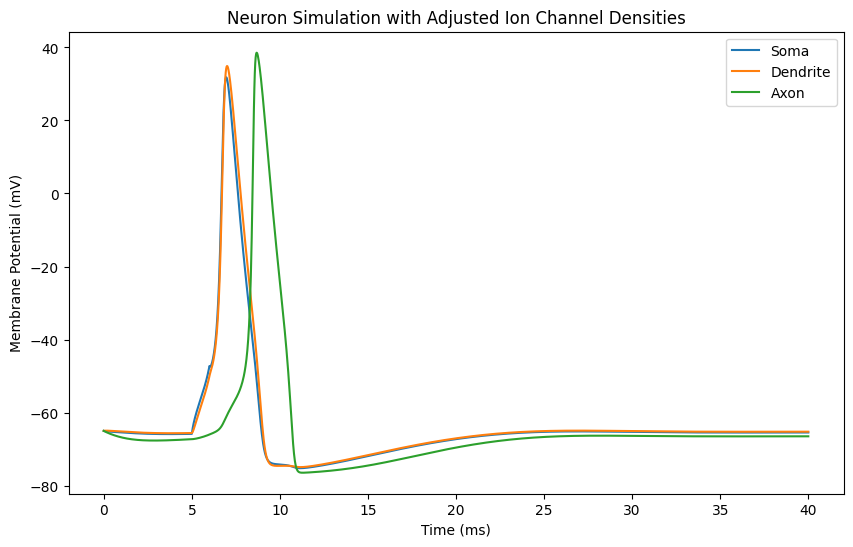

In [10]:
# Create sections: soma, dendrites, and axon
soma = h.Section(name='soma')
dend = h.Section(name='dend')
axon = h.Section(name='axon')


# Define section geometry
soma.L = soma.diam = 20  # Soma is spherical, diameter = 20 µm
dend.L = 200             # Dendrite length = 200 µm
dend.diam = 2            # Dendrite diameter = 2 µm
axon.L = 1000            # Axon length = 1000 µm
axon.diam = 1            # Axon diameter = 1 µm


# Connect the sections
dend.connect(soma(0))    # Connect dendrite to soma
axon.connect(soma(1))    # Connect axon to soma


# Insert ion channels
soma.insert('hh')  # Insert Hodgkin-Huxley mechanism in soma
dend.insert('hh')  # Insert Hodgkin-Huxley mechanism in dendrite
axon.insert('hh')  # Insert Hodgkin-Huxley mechanism in axon


# Vary ion channel densities
for seg in soma:
   seg.hh.gnabar = 0.1   # Sodium channel density (S/cm^2)
   seg.hh.gkbar = 0.05   # Increased potassium channel density (S/cm^2)


for seg in dend:
   seg.hh.gnabar = 0.06  # Increased sodium channel density (S/cm^2)
   seg.hh.gkbar = 0.02   # Moderate potassium channel density (S/cm^2)


for seg in axon:
   seg.hh.gnabar = 0.15  # Balanced sodium channel density (S/cm^2)
   seg.hh.gkbar = 0.06   # Balanced potassium channel density (S/cm^2)


# Add a current clamp to the soma
stim = h.IClamp(soma(0.5))  # Place the stimulator at the middle of the soma
stim.delay = 5.0           # Start of stimulation (ms)
stim.dur = 1.0             # Duration of stimulation (ms)
stim.amp = 0.5             # Amplitude of current (nA)


# Record membrane potentials
soma_v = h.Vector().record(soma(0.5)._ref_v)  # Record voltage at soma
dend_v = h.Vector().record(dend(0.5)._ref_v)  # Record voltage at dendrite
axon_v = h.Vector().record(axon(0.5)._ref_v)  # Record voltage at axon
t = h.Vector().record(h._ref_t)               # Record time


# Simulation control
h.tstop = 40.0  # Simulation time (ms)
h.run()


# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, soma_v, label="Soma")
plt.plot(t, dend_v, label="Dendrite")
plt.plot(t, axon_v, label="Axon")
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Neuron Simulation with Adjusted Ion Channel Densities')
plt.legend()
plt.show()

#### Examine specific component ion channel density effects

While keeping all other ion channel densities constant (at default parameters for K+ and Na+), examining the effect of changing ion channel densities (for Na+ and K+ individually) across cell components (axon, soma, and dendrites)  

For Na+:  
- Soma: Low to moderate Na⁺ channel density (~0.05 - 0.1 S/cm²)
- Axon (hillock and nodes of Ranvier): High (~0.1 - 0.3 S/cm²)
- Dendrites: Low Na⁺ channel density (~0.05 - 0.1 S/cm²)
  
For Na+: Default Distribution   
Hypothetical biologically realistic parameters per component:  
- Soma: 0.05 S/cm²
- Axon: 0.2 S/cm² (at nodes of Ranvier, and a gradient could be applied down the axon)
- Dendrites: 0.05 S/cm²\
  
For K+: Default Distribution  
- Soma: 0.2 S/cm²
- Axon (nodes): 0.05 - 0.1 S/cm²
- Dendrites: 0.2 S/cm²
  
Sodium Channel Density:   
- Na+ density in axon: 3 trials (low, moderate, high)
- Na+ density in soma: 3 trials (low moderate, high)
- Na+ density in dendrites: 3 trials (low, moderate, high)

Potassium Channel Density:  
- K+ density in axon: 3 trials (low, moderate, high)
- K+ density in soma: 3 trials (low moderate, high)
- K+ density in dendrites: 3 trials (low, moderate, high)


#### Delay changes


The code below main purpose is to create a function name SimpleNeuron with adjustible ion channel density. Using this function, we simulate a neuron with different ion channel density.  
<font color='red'>Always have to run this define function code before running the simulation</font>

In [5]:
# Define a simple neuron model with adjustable ion channel density
class SimpleNeuron:
    def __init__(self, sodium_density=0.12, potassium_density=0.036):
        self.soma = h.Section(name='soma')
        self.soma.L = 20  # Length of soma (microns)
        self.soma.diam = 20  # Diameter of soma (microns)
        self.soma.insert('hh')  # Insert Hodgkin-Huxley channels
        
        # Set ion channel densities (in S/cm^2 for conductance)
        self.soma.gnabar_hh = sodium_density  # Sodium channel density (default: 0.12 S/cm^2)
        self.soma.gkbar_hh = potassium_density  # Potassium channel density (default: 0.036 S/cm^2)


The code below create 2 neurons, pre and postsynaptic neuron with different ion channel. There are 3 stimulation to the neuron. To change the variable like delay time and duration of a stimulation, you could click into the code and change the number. Running this code will show you the result of the simulation through a graph. There is also an explanation for each code like what is it using for in the #...

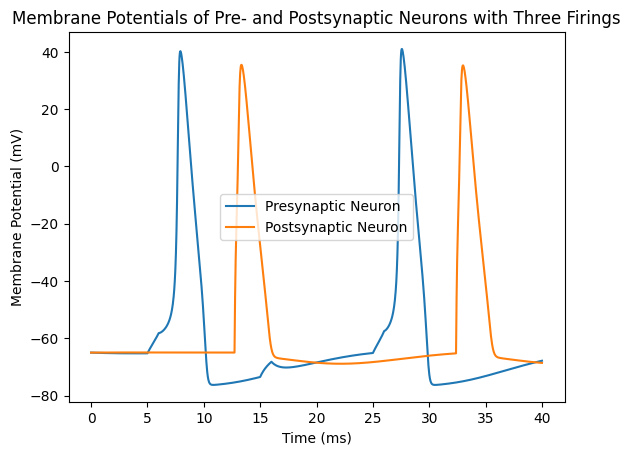

In [5]:

# Create pre- and postsynaptic neurons with different ion channel densities if desired
pre_neuron = SimpleNeuron(sodium_density=0.15, potassium_density=0.04)  # Adjust densities as needed
post_neuron = SimpleNeuron(sodium_density=0.12, potassium_density=0.036)

# Create a synapse on the postsynaptic neuron
syn = h.ExpSyn(post_neuron.soma(0.5))  # Exponential synapse at the midpoint of the postsynaptic soma
syn.tau = 2  # Synaptic time constant (ms)

# Connect the presynaptic neuron to the postsynaptic synapse
netcon = h.NetCon(pre_neuron.soma(0.5)._ref_v, syn, sec=pre_neuron.soma)  # Link voltage to synapse
netcon.weight[0] = 0.1  # Set initial synaptic weight
netcon.delay = 5  # Transmission delay (ms)

# Apply multiple current stimuli to the presynaptic neuron
stim1 = h.IClamp(pre_neuron.soma(0.5))  # First stimulus
stim1.delay = 5  # Start time of first stimulus (ms)
stim1.dur = 1  # Duration of first stimulus (ms)
stim1.amp = 0.1  # Amplitude of first stimulus (nA)

stim2 = h.IClamp(pre_neuron.soma(0.5))  # Second stimulus
stim2.delay = 15  # Start time for the second pulse (ms)
stim2.dur = 1  # Duration of the second pulse (ms)
stim2.amp = 0.1  # Amplitude of the second pulse (nA)

stim3 = h.IClamp(pre_neuron.soma(0.5))  # Third stimulus
stim3.delay = 25  # Start time for the third pulse (ms)
stim3.dur = 1  # Duration of the third pulse (ms)
stim3.amp = 0.1  # Amplitude of the third pulse (nA)

# Record time and membrane potentials for both neurons
t = h.Vector().record(h._ref_t)  # Record simulation time
v_pre = h.Vector().record(pre_neuron.soma(0.5)._ref_v)  # Record voltage from presynaptic neuron
v_post = h.Vector().record(post_neuron.soma(0.5)._ref_v)  # Record voltage from postsynaptic neuron

# Run the simulation
h.tstop = 40  # Simulation stop time (ms)
h.run()

# Plotting the results using matplotlib
plt.figure()
plt.plot(t, v_pre, label='Presynaptic Neuron')
plt.plot(t, v_post, label='Postsynaptic Neuron')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Membrane Potentials of Pre- and Postsynaptic Neurons with Three Firings')
plt.legend()
plt.show()

- Change delay time 1

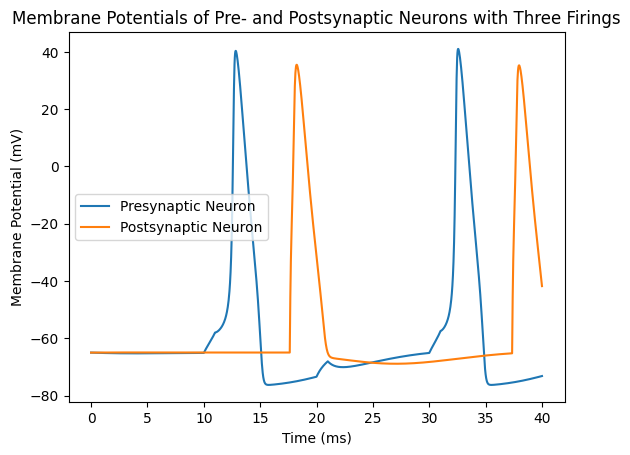

In [ ]:
# Create pre- and postsynaptic neurons with different ion channel densities if desired
pre_neuron = SimpleNeuron(sodium_density=0.15, potassium_density=0.04)  # Adjust densities as needed
post_neuron = SimpleNeuron(sodium_density=0.12, potassium_density=0.036)

# Create a synapse on the postsynaptic neuron
syn = h.ExpSyn(post_neuron.soma(0.5))  # Exponential synapse at the midpoint of the postsynaptic soma
syn.tau = 2  # Synaptic time constant (ms)

# Connect the presynaptic neuron to the postsynaptic synapse
netcon = h.NetCon(pre_neuron.soma(0.5)._ref_v, syn, sec=pre_neuron.soma)  # Link voltage to synapse
netcon.weight[0] = 0.1  # Set initial synaptic weight
netcon.delay = 5  # Transmission delay (ms)

# Apply multiple current stimuli to the presynaptic neuron
stim1 = h.IClamp(pre_neuron.soma(0.5))  # First stimulus
stim1.delay = 10  # Start time of first stimulus (ms)
stim1.dur = 1  # Duration of first stimulus (ms)
stim1.amp = 0.1  # Amplitude of first stimulus (nA)

stim2 = h.IClamp(pre_neuron.soma(0.5))  # Second stimulus
stim2.delay = 20  # Start time for the second pulse (ms)
stim2.dur = 1  # Duration of the second pulse (ms)
stim2.amp = 0.1  # Amplitude of the second pulse (nA)

stim3 = h.IClamp(pre_neuron.soma(0.5))  # Third stimulus
stim3.delay = 30  # Start time for the third pulse (ms)
stim3.dur = 1  # Duration of the third pulse (ms)
stim3.amp = 0.1  # Amplitude of the third pulse (nA)

# Record time and membrane potentials for both neurons
t = h.Vector().record(h._ref_t)  # Record simulation time
v_pre = h.Vector().record(pre_neuron.soma(0.5)._ref_v)  # Record voltage from presynaptic neuron
v_post = h.Vector().record(post_neuron.soma(0.5)._ref_v)  # Record voltage from postsynaptic neuron

# Run the simulation
h.tstop = 40  # Simulation stop time (ms)
h.run()

# Plotting the results using matplotlib
plt.figure()
plt.plot(t, v_pre, label='Presynaptic Neuron')
plt.plot(t, v_post, label='Postsynaptic Neuron')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Membrane Potentials of Pre- and Postsynaptic Neurons with Three Firings')
plt.legend()
plt.show()

- Change delay time 2

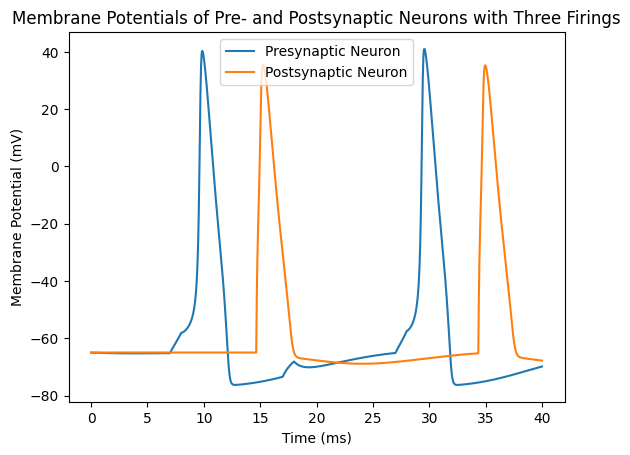

In [7]:
# Create pre- and postsynaptic neurons with different ion channel densities if desired
pre_neuron = SimpleNeuron(sodium_density=0.15, potassium_density=0.04)  # Adjust densities as needed
post_neuron = SimpleNeuron(sodium_density=0.12, potassium_density=0.036)

# Create a synapse on the postsynaptic neuron
syn = h.ExpSyn(post_neuron.soma(0.5))  # Exponential synapse at the midpoint of the postsynaptic soma
syn.tau = 2  # Synaptic time constant (ms)

# Connect the presynaptic neuron to the postsynaptic synapse
netcon = h.NetCon(pre_neuron.soma(0.5)._ref_v, syn, sec=pre_neuron.soma)  # Link voltage to synapse
netcon.weight[0] = 0.1  # Set initial synaptic weight
netcon.delay = 5  # Transmission delay (ms)

# Apply multiple current stimuli to the presynaptic neuron
stim1 = h.IClamp(pre_neuron.soma(0.5))  # First stimulus
stim1.delay = 7  # Start time of first stimulus (ms)
stim1.dur = 1  # Duration of first stimulus (ms)
stim1.amp = 0.1  # Amplitude of first stimulus (nA)

stim2 = h.IClamp(pre_neuron.soma(0.5))  # Second stimulus
stim2.delay = 17  # Start time for the second pulse (ms)
stim2.dur = 1  # Duration of the second pulse (ms)
stim2.amp = 0.1  # Amplitude of the second pulse (nA)

stim3 = h.IClamp(pre_neuron.soma(0.5))  # Third stimulus
stim3.delay = 27  # Start time for the third pulse (ms)
stim3.dur = 1  # Duration of the third pulse (ms)
stim3.amp = 0.1  # Amplitude of the third pulse (nA)

# Record time and membrane potentials for both neurons
t = h.Vector().record(h._ref_t)  # Record simulation time
v_pre = h.Vector().record(pre_neuron.soma(0.5)._ref_v)  # Record voltage from presynaptic neuron
v_post = h.Vector().record(post_neuron.soma(0.5)._ref_v)  # Record voltage from postsynaptic neuron

# Run the simulation
h.tstop = 40  # Simulation stop time (ms)
h.run()

# Plotting the results using matplotlib
plt.figure()
plt.plot(t, v_pre, label='Presynaptic Neuron')
plt.plot(t, v_post, label='Postsynaptic Neuron')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Membrane Potentials of Pre- and Postsynaptic Neurons with Three Firings')
plt.legend()
plt.show()

- Change delay time 3:

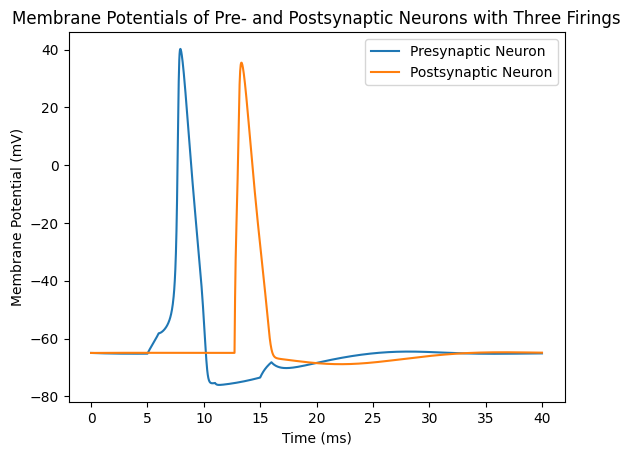

In [9]:
# Create pre- and postsynaptic neurons with different ion channel densities if desired
pre_neuron = SimpleNeuron(sodium_density=0.15, potassium_density=0.04)  # Adjust densities as needed
post_neuron = SimpleNeuron(sodium_density=0.12, potassium_density=0.036)

# Create a synapse on the postsynaptic neuron
syn = h.ExpSyn(post_neuron.soma(0.5))  # Exponential synapse at the midpoint of the postsynaptic soma
syn.tau = 2  # Synaptic time constant (ms)

# Connect the presynaptic neuron to the postsynaptic synapse
netcon = h.NetCon(pre_neuron.soma(0.5)._ref_v, syn, sec=pre_neuron.soma)  # Link voltage to synapse
netcon.weight[0] = 0.1  # Set initial synaptic weight
netcon.delay = 5  # Transmission delay (ms)

# Apply multiple current stimuli to the presynaptic neuron
stim1 = h.IClamp(pre_neuron.soma(0.5))  # First stimulus
stim1.delay = 5  # Start time of first stimulus (ms)
stim1.dur = 1  # Duration of first stimulus (ms)
stim1.amp = 0.1  # Amplitude of first stimulus (nA)

stim2 = h.IClamp(pre_neuron.soma(0.5))  # Second stimulus
stim2.delay = 10  # Start time for the second pulse (ms)
stim2.dur = 1  # Duration of the second pulse (ms)
stim2.amp = 0.1  # Amplitude of the second pulse (nA)

stim3 = h.IClamp(pre_neuron.soma(0.5))  # Third stimulus
stim3.delay = 15  # Start time for the third pulse (ms)
stim3.dur = 1  # Duration of the third pulse (ms)
stim3.amp = 0.1  # Amplitude of the third pulse (nA)

# Record time and membrane potentials for both neurons
t = h.Vector().record(h._ref_t)  # Record simulation time
v_pre = h.Vector().record(pre_neuron.soma(0.5)._ref_v)  # Record voltage from presynaptic neuron
v_post = h.Vector().record(post_neuron.soma(0.5)._ref_v)  # Record voltage from postsynaptic neuron

# Run the simulation
h.tstop = 40  # Simulation stop time (ms)
h.run()

# Plotting the results using matplotlib
plt.figure()
plt.plot(t, v_pre, label='Presynaptic Neuron')
plt.plot(t, v_post, label='Postsynaptic Neuron')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Membrane Potentials of Pre- and Postsynaptic Neurons with Three Firings')
plt.legend()
plt.show()


Weight and delay

In [ ]:
# Connect the presynaptic neuron to the postsynaptic synapse
netcon = h.NetCon(pre_neuron.soma(0.5)._ref_v, syn, sec=pre_neuron.soma)  # Link voltage to synapse
netcon.weight[0] = 0.1  # Set initial synaptic weight
netcon.delay = 5  # Transmission delay (ms)

Above are the 2 parameters that will control the weight and delay of a synaptic connection

`netcon.weight[0] = {some value}`: Where {some value} can be adjusted to model differnet synaptic weights

`netcon.delay = {some value}`: Where {some value} is the transmission delay between the pre and post synaptic neuron.

Channel Density

In [ ]:
pre_neuron = SimpleNeuron(sodium_density=0.15, potassium_density=0.04)  # Adjust densities as needed
post_neuron = SimpleNeuron(sodium_density=0.12, potassium_density=0.036)

Above is the code to adjust the density of the sodium and potassium channels. When creating the neuron with the SimpleNeuron class, you can adjust the values above.